<a href="https://colab.research.google.com/github/godots/python-data-analysis/blob/master/%EC%B9%B4%EC%9D%B4%EC%8A%A4%ED%8A%B8_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 카이스트 과학 데이터스쿨


http://mooc-kacademy.kisti.re.kr/ko/take/courseware/663820/learning?uol_id=oc0KcmTA4sgwNTz39bfIT5NvZxnJsyFm&lo_id=V9RJTBzTuqvWSHKJSrMMDB11JaQH65Hk&drg_id=fT96Mhz8W2ze3sLSlwIrFBNOXeIKU9Q9

- tf.상수
- tf.변수
- tf.placeholder



## 인공지능 기초 (텐서플로우)

In [15]:
import tensorflow as tf
a = tf.constant(10)

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
node1 = tf.compat.v1.placeholder(tf.float32)
node2 = tf.compat.v1.placeholder(tf.float32)

In [10]:
# 연산 정의
node3 = node1 + node2

In [11]:
# session 정의
sess = tf.Session()

In [15]:
print(sess.run(node3, feed_dict={node1:2, node2:4}))

6.0


In [19]:
print(sess.run(node3, feed_dict={node1:[3,2], node2:[5]}))
# 리스트는 벡터 타입으로 넣어준 것. '''

[8. 7.]


## 텐서플로우 용어

- 텐서 랭크
: 랭크 1은 벡터, 0은 스칼라, 
2는 매트릭스
- 텐서 shape (차원을 말함)
- 데이터 타입

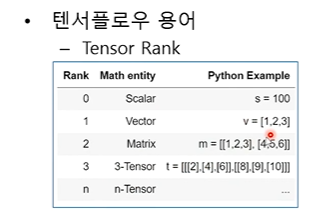

## 텐서플로우 기본 함수

In [2]:
import numpy as np

In [23]:
x = [[1.,2.,3.], [4.,5.,6.]]

In [27]:
sess = tf.Session()

In [28]:
print("x = ", x)

x =  [[1. 2. 3.]
 [4. 5. 6.]]


In [29]:
sess.run(tf.reduce_mean(x))

3.5

In [32]:
sess.run(tf.reduce_mean(x, axis=0))

array([2.5, 3.5, 4.5])

## 선형회귀분석 : 기계학습을 이용한 분류

In [3]:
# 1000개 랜덤 데이터 만들기
num_data = 1000
sample_data = []
for i in range(num_data):
  x1 = np.random.normal(0.0, 0.5)
  y1 = 0.1 * x1 + 0.3 + np.random.normal(0.0, 0.02)
  sample_data.append([x1, y1])

In [7]:
import matplotlib.pyplot as plt

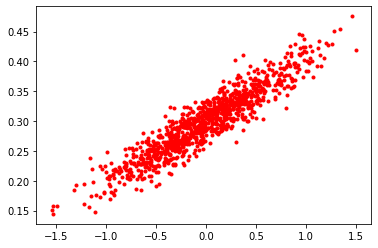

In [14]:
# 데이터 쪼개기
x_data = [v[0] for v in sample_data]
y_data = [v[1] for v in sample_data]

plt.plot(x_data, y_data, 'r.', label ="sample")
plt.show()

In [17]:
# 텐서플로우 정의
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

In [18]:
y = w*x_data +b

In [19]:
# 실제-예측을 제곱하여 평균한 값
loss = tf.reduce_mean(tf.square(y-y_data))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.5)

In [21]:
train = optimizer.minimize(loss)

0 [0.13756199] [0.30087963] 0.0007202599


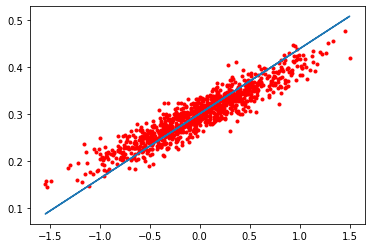

1 [0.12863405] [0.3004843] 0.000580799


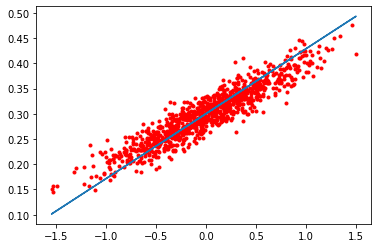

2 [0.12196659] [0.30030745] 0.00050310564


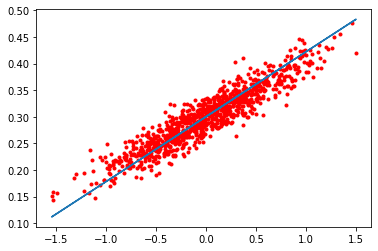

3 [0.11698963] [0.30017537] 0.00045981506


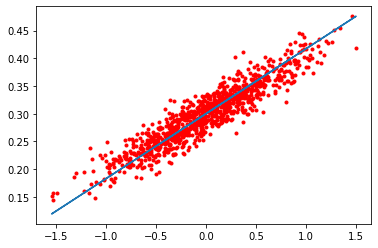

4 [0.11327454] [0.30007678] 0.00043569374


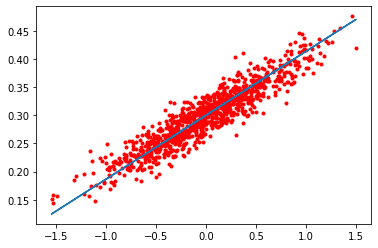

5 [0.11050139] [0.3000032] 0.00042225342


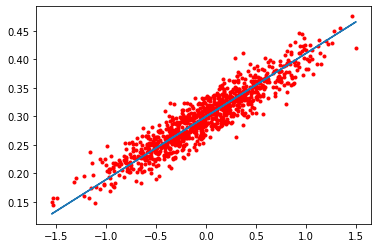

6 [0.10843136] [0.29994828] 0.00041476454


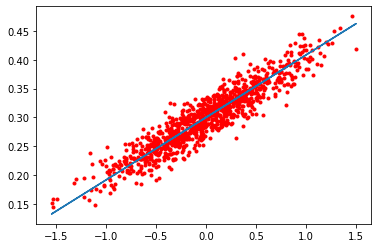

7 [0.10688617] [0.29990727] 0.00041059172


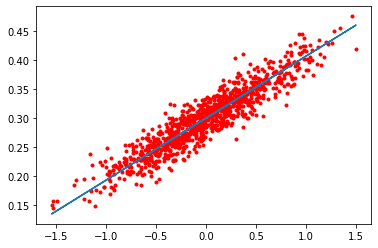

In [25]:
# 변수 초기화
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# 반복 횟수
num_epochs = 8

# 학습 수행
for step in range(num_epochs):
  sess.run(train)

  print(step, sess.run(w), sess.run(b), sess.run(loss))

  plt.plot(x_data, y_data, 'r.')
  plt.plot(x_data, sess.run(w) * x_data + sess.run(b))

  plt.show()